## Лабораторная работа №2
** Выполнила: Елизарова Юлия**

В работе будет рассмотрена задача классификации на примере возможности выяления и предсказания фактов фальсификации финансовой отчетности (на основании ключевых показателей отчетности компаний, торгующихся на американской фондовой бирже). В качестве зависимой переменной будет выступать аудиторское заключение по компании об отсутствии или наличии выявленного факта мошенничества.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inlinedata = pd.read_csv(r'C:\\Users\\Julia\\Desktop\\Data_audit.csv', sep = ";")

In [3]:
data = pd.read_csv(r'C:\\Users\\Julia\\Desktop\\Data_audit.csv', sep = ";")

# 1. Предобработка данных

In [4]:
data['catas'].dtype.namedata['loc'].dtype.name

'float64'

In [5]:
data['loc'].dtype.name

'object'

In [6]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object'] 
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)for c in categorical_columns:
    print(c, data[c].unique())

['conml', 'loc', 'DataDate']
['auop', 'intas', 'gptas', 'nptas', 'catas', 'cacl', 'ctas', 'incl', 'ltdtas', 'npgp', 'tdtas', 'fastas', 'tatasly', 'gpns', 'npic', 'caicl', 'wctas', 'nstas', 'inic', 'slic', 'incas', 'ebit', 'nitas', 'ninas', 'nisl', 'nifas', 'trcgs', 'tafas', 'ttrev', 'defas', 'ldsdta']


In [7]:
for c in categorical_columns:
    print(c, data[c].unique())

conml ['United Dominion Industries' 'Abitibi-Consolidated Inc.'
 'ASM International NV' ..., 'Allegion Plc' 'Dorian LPG Ltd'
 'Nomad Foods Ltd']
loc ['USA' 'CAN' 'NLD' 'ISR' 'IRL' 'BMU' 'PHL' 'GBR' 'ESP' 'FRA' 'JPN' 'SGP'
 'CHN' 'BEL' 'CHE' 'SWE' 'FIN' 'NOR' 'DNK' 'ZAF' 'PAN' 'CYM' 'MEX' 'HKG'
 'ANT' 'LUX' 'AUS' 'ITA' 'BOL' 'GRC' 'MCO' 'DEU' 'NZL' 'CHL' 'IND' 'PRT'
 'CUW' 'VEN' 'KOR' 'BRA' 'HUN' 'JEY' 'MYS' 'ARG' 'BHS' 'IDN' 'MAC' 'PNG'
 'TWN' 'PER' 'RUS' 'THA' 'POL' 'BLZ' 'TUR' 'ISL' 'AUT' 'URY' 'COL' 'GHA']
DataDate ['31.12.1985' '31.12.1986' '31.12.1987' '31.12.1988' '31.12.1989'
 '31.12.1991' '31.12.1992' '31.12.1993' '31.12.1994' '31.12.1995'
 '31.12.1996' '31.12.1997' '31.12.1998' '31.12.1999' '31.12.2000'
 '31.12.1990' '31.12.2001' '31.12.2002' '31.12.2003' '31.12.2004'
 '31.12.2005' '31.12.2006' '31.12.1982' '31.12.1983' '31.12.1984'
 '31.12.2007' '31.12.2008' '31.12.2009' '31.12.2010' '31.12.2011'
 '31.12.2012' '31.12.2013' '31.12.2014' '31.12.2015' '31.12.2016'
 '30.09.1982' 

In [8]:
data.median(axis = 0)data = data.fillna(data.median(axis = 0), axis = 0)

auop          1.000000
intas         0.037125
gptas         0.193756
nptas         0.142784
catas         0.302972
cacl          1.281365
ctas          0.050370
incl          0.165037
ltdtas        0.152489
npgp          0.794843
tdtas         0.398550
fastas        0.517985
tatasly       1.000000
gpns          0.382642
npic          0.268760
caicl         0.976254
wctas         0.063915
nstas         0.554561
inic          0.053371
slic          0.875301
incas         0.120547
ebit       2733.345000
nitas         0.037918
ninas         0.110805
nisl          0.072425
nifas         0.054540
trcgs         1.000000
tafas         1.000000
ttrev         1.000000
defas         1.000000
ldsdta        1.000000
dtype: float64

In [9]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [10]:
data[numerical_columns].count(axis = 0)

auop       21565
intas      21565
gptas      21565
nptas      21565
catas      21565
cacl       21565
ctas       21565
incl       21565
ltdtas     21565
npgp       21565
tdtas      21565
fastas     21565
tatasly    21565
gpns       21565
npic       21565
caicl      21565
wctas      21565
nstas      21565
inic       21565
slic       21565
incas      21565
ebit       21565
nitas      21565
ninas      21565
nisl       21565
nifas      21565
trcgs      21565
tafas      21565
ttrev      21565
defas      21565
ldsdta     21565
dtype: int64

In [11]:
data['loc'].describe()

count     21565
unique       60
top         CAN
freq       3075
Name: loc, dtype: object

In [12]:
data.describe(include = [object])data_describe = data.describe(include = [object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

,conml,loc,DataDate
count,21565,21565,21565
unique,1678,60,408
top,Novo Nordisk A/S,CAN,31.12.2003
freq,79,3075,674


In [13]:
data_describe = data.describe(include = [object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [14]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)data['loc'].unique()

[] ['conml', 'loc', 'DataDate']


In [15]:
data['loc'].unique()

array(['USA', 'CAN', 'NLD', 'ISR', 'IRL', 'BMU', 'PHL', 'GBR', 'ESP',
       'FRA', 'JPN', 'SGP', 'CHN', 'BEL', 'CHE', 'SWE', 'FIN', 'NOR',
       'DNK', 'ZAF', 'PAN', 'CYM', 'MEX', 'HKG', 'ANT', 'LUX', 'AUS',
       'ITA', 'BOL', 'GRC', 'MCO', 'DEU', 'NZL', 'CHL', 'IND', 'PRT',
       'CUW', 'VEN', 'KOR', 'BRA', 'HUN', 'JEY', 'MYS', 'ARG', 'BHS',
       'IDN', 'MAC', 'PNG', 'TWN', 'PER', 'RUS', 'THA', 'POL', 'BLZ',
       'TUR', 'ISL', 'AUT', 'URY', 'COL', 'GHA'], dtype=object)

In [16]:
data_nonbinary = pd.get_dummies(data['loc'])
print(data_nonbinary.columns)

Index(['ANT', 'ARG', 'AUS', 'AUT', 'BEL', 'BHS', 'BLZ', 'BMU', 'BOL', 'BRA',
       'CAN', 'CHE', 'CHL', 'CHN', 'COL', 'CUW', 'CYM', 'DEU', 'DNK', 'ESP',
       'FIN', 'FRA', 'GBR', 'GHA', 'GRC', 'HKG', 'HUN', 'IDN', 'IND', 'IRL',
       'ISL', 'ISR', 'ITA', 'JEY', 'JPN', 'KOR', 'LUX', 'MAC', 'MCO', 'MEX',
       'MYS', 'NLD', 'NOR', 'NZL', 'PAN', 'PER', 'PHL', 'PNG', 'POL', 'PRT',
       'RUS', 'SGP', 'SWE', 'THA', 'TUR', 'TWN', 'URY', 'USA', 'VEN', 'ZAF'],
      dtype='object')


In [17]:
nonbinary_columns = ['loc']

In [18]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,auop,intas,gptas,nptas,catas,cacl,ctas,incl,ltdtas,npgp,...,ebit,nitas,ninas,nisl,nifas,trcgs,tafas,ttrev,defas,ldsdta
count,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000,...,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000,21565.000000
mean,1.629956,0.071835,0.227424,0.117119,0.327162,1.872637,0.089691,0.535517,0.181748,0.361364,...,12678.293797,0.031432,0.084757,-0.725551,0.249149,0.894133,1.286055,1.349424,1.719008,1.040599
std,1.222984,0.090411,0.202277,0.523943,0.243448,5.287592,0.116556,9.069063,0.166983,137.608727,...,29501.094451,0.207415,1.803849,57.839597,21.687419,15.278540,38.573951,44.318867,44.888240,5.821885
min,0.000000,0.000000,-3.820055,-29.180662,0.000000,0.000000,-0.016112,0.000000,0.000000,-18239.000000,...,-15260.776000,-18.568807,-61.654838,-5637.437500,-1377.466165,-841.653543,-1652.157471,-38.088235,-292.302859,0.000000
25%,1.000000,0.002698,0.093780,0.024552,0.128005,0.749072,0.017261,0.000000,0.053237,0.234461,...,648.246000,0.007533,0.037950,0.021269,0.000000,0.954107,0.908859,0.995198,1.000000,0.938182
50%,1.000000,0.037125,0.193756,0.142784,0.302972,1.281365,0.050370,0.165037,0.152489,0.794843,...,2733.345000,0.037918,0.110805,0.072425,0.054540,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,0.116546,0.324393,0.301233,0.506176,2.003565,0.114484,0.439484,0.269208,1.529336,...,11588.000000,0.077344,0.185718,0.148513,0.166841,1.004905,1.003823,1.112033,1.222609,1.014077
max,4.000000,0.993952,2.101139,1.444099,1.000000,310.821782,0.996235,584.931818,6.103740,6243.659306,...,465406.282000,1.168020,141.741936,1861.000000,1020.129114,1770.380234,3935.760423,6501.800000,6242.334674,745.203662


In [19]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [20]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)

(21565, 91)


# 2. Выделение X и y

In [21]:
X = data.drop(('auop'), axis = 1) 
y = np.asarray(data['auop'], dtype="|S6")
feature_names = X.columnsprint(X.shape)
print(y.shape)
N, d = X.shape

In [22]:
print(X.shape)
print(y.shape)
N, d = X.shape

(21565, 90)
(21565,)


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

15095 6470


## 3. Применение методов машинного обучения

# Neural network

In [24]:
from sklearn.neural_network import MLPClassifier

In [25]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [26]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [27]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))print(mlp_model.score(X_train, y_train), mlp_model.score(X_test, y_test))

0.208015899304 0.23029366306


In [28]:
print(mlp_model.score(X_train, y_train), mlp_model.score(X_test, y_test))

0.791984100696 0.76970633694


In [29]:
print(1 - mlp_model.score(X_test, y_test))

0.23029366306


Оптимизация гиперпараметров

In [35]:
alpha_arr = [0.0001, 0.001, 0.01, 0.1]
neuron_arr = [50, 100, 150, 200]
test_err_alpha = []
train_err_alpha = []
test_err_neuron = []
train_err_neuron = []
for alpha in alpha_arr:
    for neuron in neuron_arr:
        mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (neuron,), 
                                  solver = 'lbfgs', activation = 'logistic', random_state = 42)
        mlp_model.fit(X_train, y_train)

        y_train_pred = mlp_model.predict(X_train)
        y_test_pred = mlp_model.predict(X_test)
        train_err_neuron.append(np.mean(y_train != y_train_pred))
        test_err_neuron.append(np.mean(y_test != y_test_pred))
        
    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err_alpha.append(np.mean(y_train != y_train_pred))
    test_err_alpha.append(np.mean(y_test != y_test_pred))

In [36]:
min_train_err_alpha = np.min(train_err_alpha)
min_test_err_alpha = np.min(test_err_alpha)
print(min_train_err_alpha, min_test_err_alpha)

0.219410400795 0.227820710974


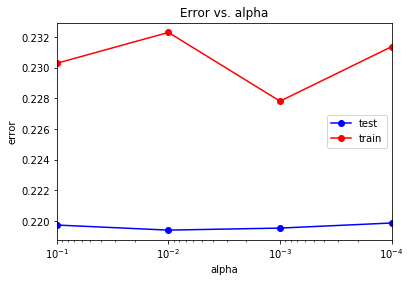

In [39]:
plt.semilogx(alpha_arr, train_err_alpha, 'b-o', label = 'test')
plt.semilogx(alpha_arr, test_err_alpha, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

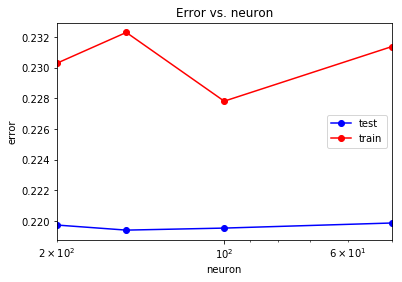

In [42]:
plt.semilogx(neuron_arr, train_err_alpha, 'b-o', label = 'test')
plt.semilogx(neuron_arr, test_err_alpha, 'r-o', label = 'train')
plt.xlim([np.max(neuron_arr), np.min(neuron_arr)])
plt.title('Error vs. neuron')
plt.xlabel('neuron')
plt.ylabel('error')
plt.legend()
pass

In [46]:
alpha_opt = alpha_arr[test_err_alpha == 0.227820710974]
print(alpha_opt)

0.0001


In [47]:
min_train_err_neuron = np.min(train_err_neuron)
min_test_err_neuron = np.min(test_err_neuron)
print(min_train_err_neuron, min_test_err_neuron)

0.194700231865 0.227820710974


In [48]:
neuron_opt = neuron_arr[test_err_neuron == 0.227820710974]
print(neuron_opt)

50


In [49]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron_opt,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.196157668102
0.233693972179


In [50]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[4671   30   22   44 1065]
 [   5    5    0    0    5]
 [   1    0    0    0    0]
 [   2    0    0    1    2]
 [ 314   11    6    5  281]]


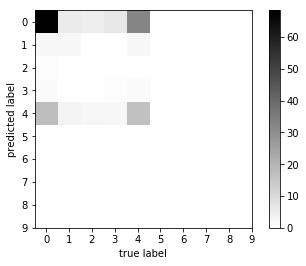

In [51]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

  b'-0.515'       0.80      0.94      0.86      4993
  b'-1.332'       0.33      0.11      0.16        46
  b'0.3025'       0.00      0.00      0.00        28
  b'1.1202'       0.20      0.02      0.04        50
  b'1.9379'       0.46      0.21      0.29      1353

avg / total       0.72      0.77      0.73      6470

